# Tutorial example: plotting with Python

We'll load the `palmerpenguins` dataset, and produce a simple scatter plot using different plotting packages for comparison. Each of these plots can be adjusted in many ways, and you should explore the documentation of those packages to get an idea of the possibilities (and the specific syntax to use).

In [118]:
# pip install palmerpenguins 
# conda activate condapython
# conda install -c conda-forge r-palmerpenguins
import palmerpenguins
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


Let's check that things work by looking at the first few rows of the dataset

In [119]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Plotting with matplotlib

Let's make a plot with the standard pyplot package:

Text(0, 0.5, 'Body Mass (g)')

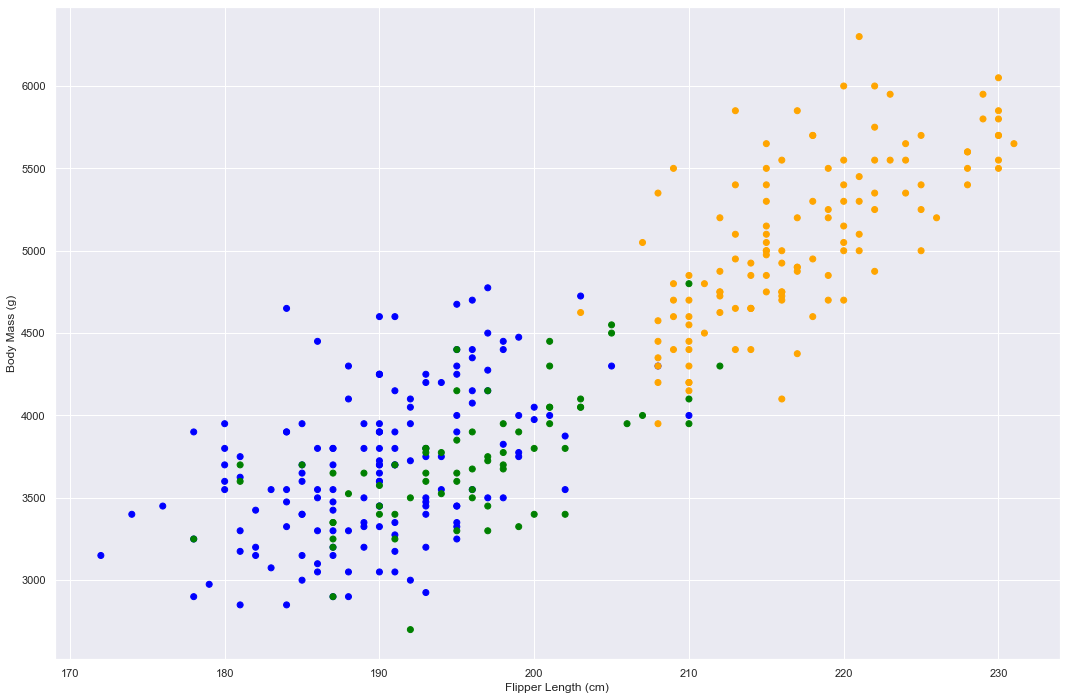

In [120]:
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

import matplotlib.pyplot as plt
# set jupyter notebook figure size
plt.rcParams['figure.figsize'] = [18, 12]

colors = {'Adelie':'blue', 'Gentoo':'orange', 'Chinstrap':'green'}
plt.scatter(penguins.flipper_length_mm,
penguins.body_mass_g, 
c= penguins.species.apply(lambda x: colors[x]))
plt.xlabel('Flipper Length (cm)')
plt.ylabel('Body Mass (g)')

## Using plotnine

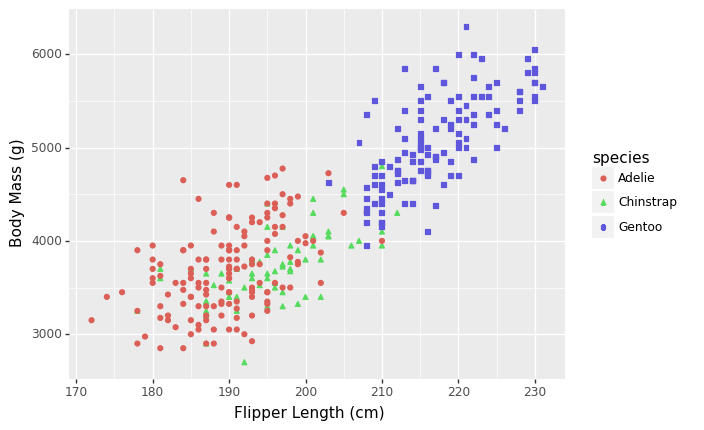

<ggplot: (8760302341527)>

In [121]:
# conda install -c conda-forge plotnine 
# https://plotnine.readthedocs.io/en/stable/

from plotnine import *

# note the use of parentheses, because the syntax below (+) is non-standard in Python
p = (ggplot(penguins) +
  geom_point(aes(x = 'flipper_length_mm',
                  y = 'body_mass_g',
                  color = 'species',
                  shape = 'species')) +
  xlab("Flipper Length (cm)") +
  ylab("Body Mass (g)"))

p

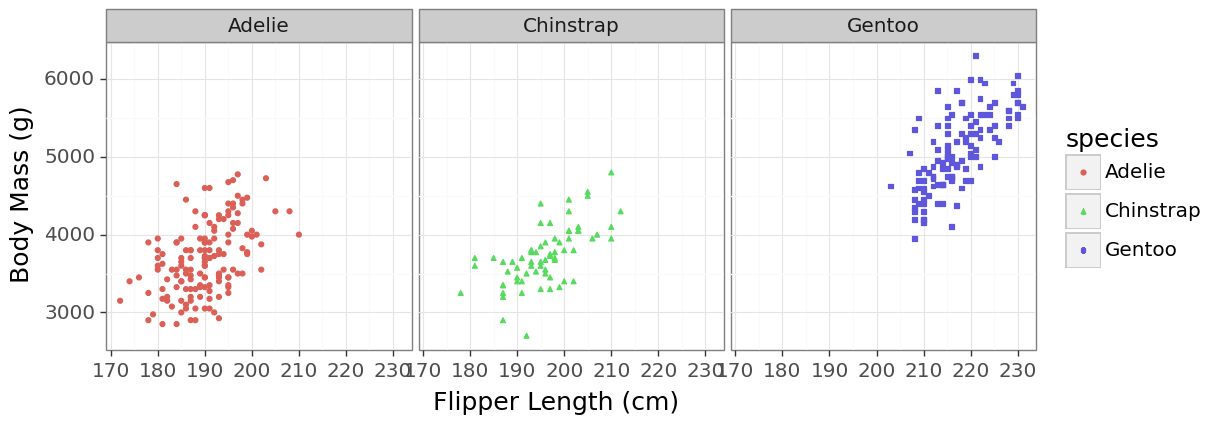

<ggplot: (8760310548336)>

In [122]:
(p + facet_wrap('~species') + theme_bw(18) +  theme(figure_size = (12, 4)))

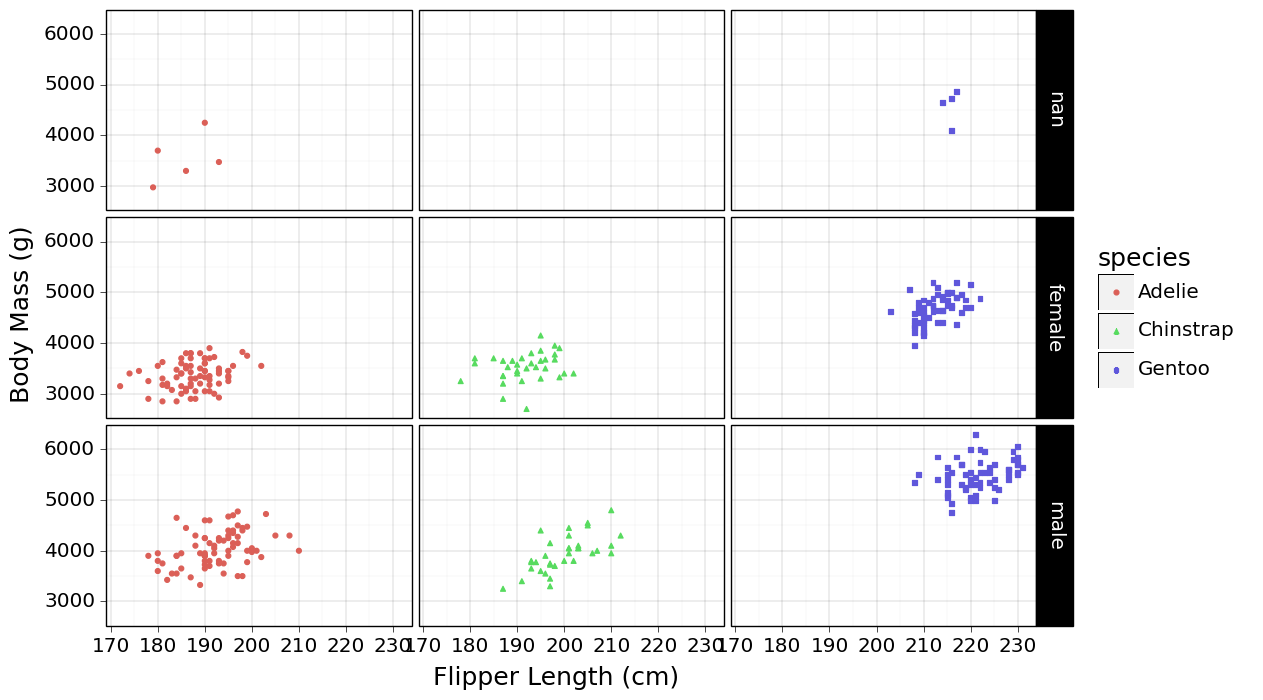

<ggplot: (8760310604743)>

In [123]:
(p + facet_grid('sex~species') + theme_linedraw(18) + theme(figure_size = (12, 8)))

In [125]:
p.save( "figures/plotnine.png",  dpi=200, width=8, height=5, units='in')
p.save( "figures/plotnine.pdf",  width=6.26, height=4, units='in')

In [126]:

p2 = (p + theme(legend_position='top', legend_direction='horizontal'))
p2

p2.save( "figures/plotnine_1col.pdf",  width=3,height=2,units='in')


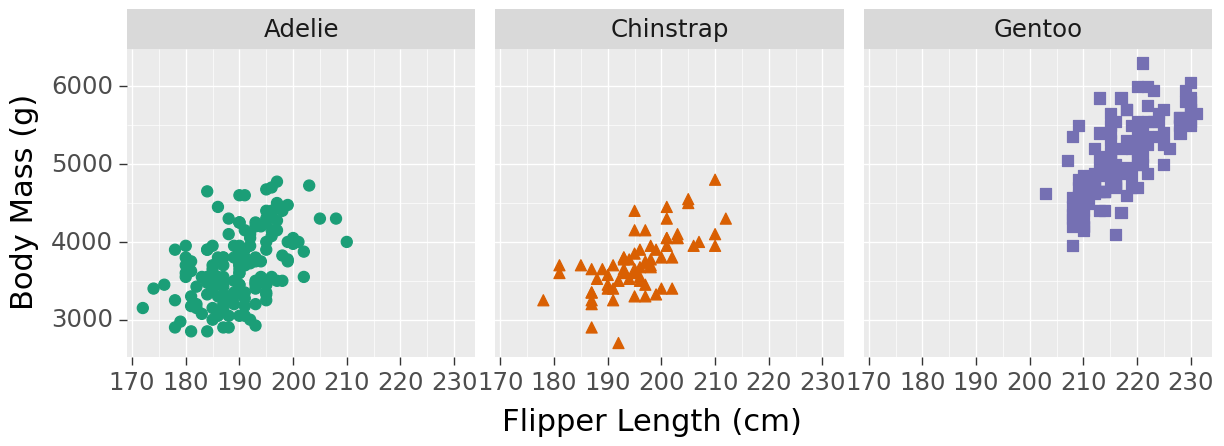

<ggplot: (8760301517547)>

In [130]:

p3 = (ggplot(penguins) +
  geom_point(aes(x = 'flipper_length_mm',
                  y = 'body_mass_g',
                  color = 'species',
                  shape = 'species'), size=4) +
  scale_color_brewer(type='qual', palette=2) +
  xlab("Flipper Length (cm)") +
  ylab("Body Mass (g)") +
  theme_grey(22))

p3.save( "plotnine_big.svg",  width=12,height=8,units='in')

p4 = (p3 + facet_grid( '~species') + theme(panel_spacing=0.2, legend_position='none'))
p4.save( "plotnine_big2.svg",  width=14,height=4,units='in')
p4 + theme(figure_size = (14,4))

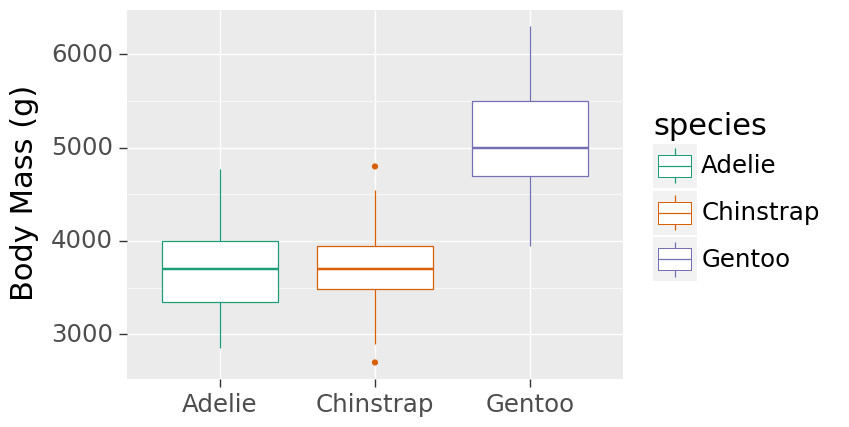

<ggplot: (8760261004683)>

In [151]:
 (ggplot(penguins) +
  geom_boxplot(aes(x = 'factor(species)',
                  y = 'body_mass_g',
                  color = 'factor(species)')) +
  scale_color_brewer(name='species', type='qual', palette=2) +
  xlab("") +
  ylab("Body Mass (g)") +
  theme_grey(22))


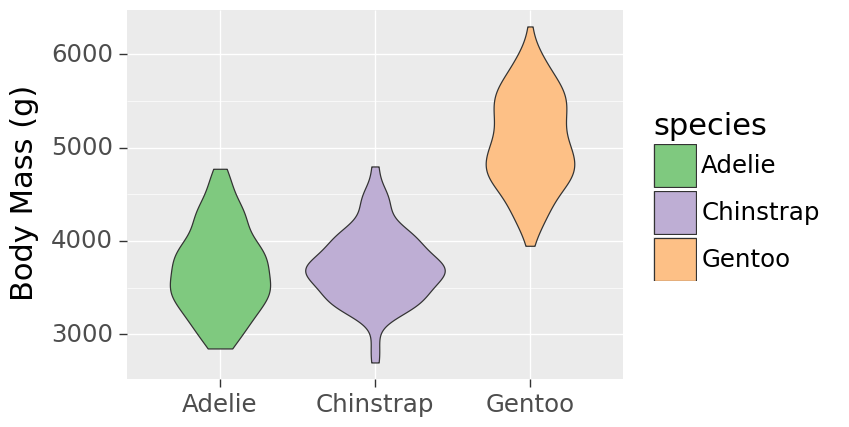

<ggplot: (8760260020170)>

In [155]:
 (ggplot(penguins) +
  geom_violin(aes(x = 'factor(species)',
                  y = 'body_mass_g',
                  fill = 'factor(species)')) +
  scale_fill_brewer(name='species', type='qual', palette=1) +
  xlab("") +
  ylab("Body Mass (g)") +
  theme_grey(22))


## Interactive plotting with plotly

In [5]:
# https://plotly.com/python/getting-started/
# conda install -c plotly plotly=5.14.1 
# conda install -c conda-forge nbformat
import plotly.express as px

fig = px.scatter(penguins,
                 x="flipper_length_mm",
                 y="body_mass_g",
                 color= "species",
                 symbol= "species",
                 labels=dict(flipper_length_mm="Flipper Length",
                             body_mass_g="Body Mass"),
                 width=800, height=600)
fig.show()

## Plotting with seaborn

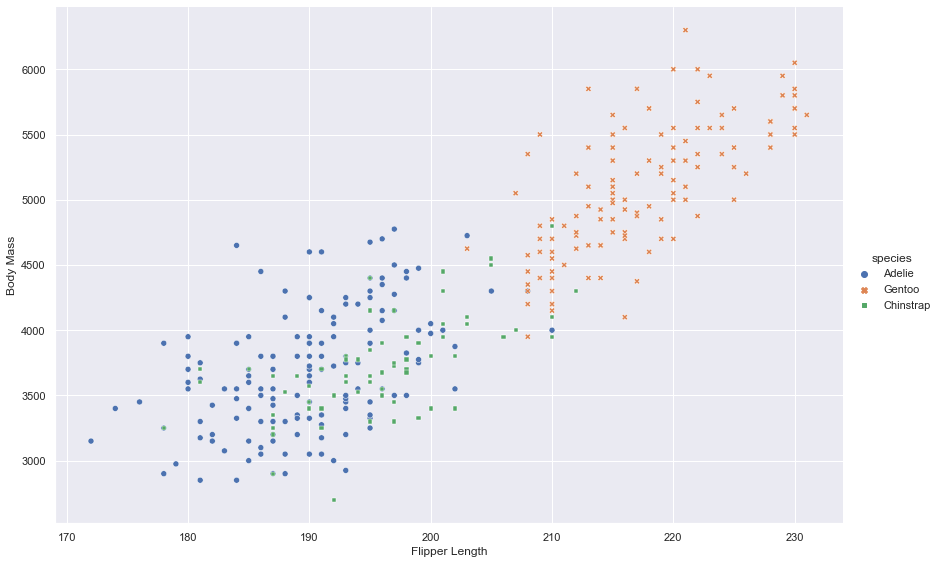

In [7]:
# https://seaborn.pydata.org/
#  conda install -c anaconda seaborn 
import seaborn as sns 

# Apply the default theme
sns.set_theme()
# sns.set_style('whitegrid')

p = sns.relplot(x = 'flipper_length_mm',
            y ='body_mass_g',
            hue = 'species',
            style = 'species',
            data = penguins, height=8, aspect=12/8)
p.set_xlabels('Flipper Length')
p.set_ylabels('Body Mass') 

## Plotting with altair

In [8]:
#  conda install -c conda-forge altair
# https://altair-viz.github.io/
import altair as alt

In [9]:
chart = alt.Chart(penguins).mark_point().encode(
    x = 'flipper_length_mm:Q',
    y ='body_mass_g:Q',
    color='species:N',
).properties(width=800, height=600)
chart

alt.Chart(...)

The x and y axes include 0 by default, which we can adjust by providing a scale. While we're at it, let's split the plot into different panels for illustration:

In [23]:
chart = alt.Chart(penguins).mark_point().encode(
    alt.X('flipper_length_mm:Q',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('body_mass_g:Q',
        scale=alt.Scale(zero=False)
    ),
    color='species:N',
    column=alt.Column('island', header=alt.Header(titleFontSize=18,labelFontSize=14)),
).configure_axis(
    labelFontSize=14,
    titleFontSize=18,
    
).configure_title(fontSize=18).configure_legend(labelFontSize=14).properties(width=300,height=300)

chart



alt.Chart(...)

## Suggested exercises


### Data input/output

Instead of using a built-in dataset like in the examples above:

1. Take a look at the [10 mins introduction to `pandas`](https://pandas.pydata.org/docs/user_guide/10min.html#min); the dataframe format is very useful to mix numeric variables (as in a standard numpy matrix) together with other types (dates, categories, strings, etc.)
1. Create a synthetic dataset with 5 (or more) variables, at least one of which should be a categorical type (as in the penguin species, or islands above)
1. Export these data into a CSV file on your computer, and re-import them as if this was a dataset provided to you in this format

### Faceted plots

Try to create small multiples (facets, also called trellis) for the plots above, using one or two categories to facet by rows and/or columns.

### Different aesthetics

Try mapping different aesthetics, such as:

- line type (solid, dashed, etc.)
- point shape
- point size
- line width, opacity, ... see what is available

### Different plot types

Try producing the following kinds of plots:

- A boxplot
- A violing plot
- A heatmap

### Fine-tuning

Read the documentation to figure out how to polish your plot, notably:

- change the colour scheme/palette
- change the theme (e.g. dark background, large font size for all the text)
- suppress the legend
- render LaTeX-like strings in the axis labels, e.g `$\alpha = \int_0^\infty \beta(x)dx$`
- optional: add interactive tooltips (in plotly)

### Saving plots

Check the options to save your graphic as 

- png, with size 6x4 inches and resolution of 300dpi
- pdf, with transparent background and size 6x4 inches
- square svg of size 4x4 inches
